In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet2
from mne.io import read_raw_edf

# Load EEG data from EDF file
file_path = "eeg_file/01IS-1-ADP.edf"
raw = read_raw_edf(file_path, preload=True)

# Extract sampling rate and EEG signal
sampling_rate = int(raw.info['sfreq'])
eeg_signal = raw.get_data(picks="eeg")[2]  # Selecting the 3rd EEG channel (index 2)

Extracting EDF parameters from /media/artem/data/Dev/Sleep_analysis/01IS-1-ADP.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7529215  =      0.000 ... 29410.996 secs...


In [10]:

# Define the time vector
t = np.arange(len(eeg_signal)) / sampling_rate

# Define wavelet scales and frequencies
frequencies = np.logspace(0.00001, 2, 50) -1   # Logarithmic range: ~1 Hz to 100 Hz
scales = sampling_rate / (2 * np.pi * frequencies)  # Scales for the CWT

# Perform the continuous wavelet transform
coefficients = cwt(eeg_signal, morlet2, scales, w=5)  # w=5 defines the width of the Morlet wavelet

# Compute log power
power = np.abs(coefficients) ** 2
log_power = 10*np.log10(power + 1e-10)  # Add a small constant to avoid log(0)

/tmp/ipykernel_22927/575550528.py:9: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  coefficients = cwt(eeg_signal, morlet2, scales, w=5)  # w=5 defines the width of the Morlet wavelet


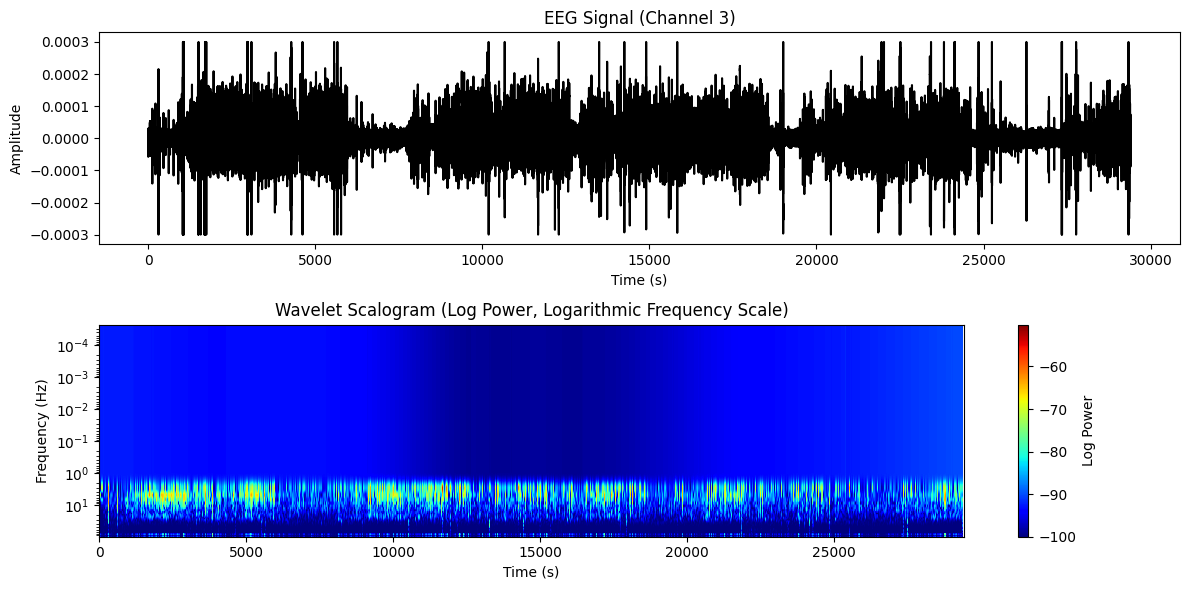

In [11]:

# Plot the EEG signal
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, eeg_signal, color='black')
plt.title("EEG Signal (Channel 3)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Plot the log power scalogram
plt.subplot(2, 1, 2)
plt.imshow(
    log_power, extent=[t[0], t[-1], frequencies[-1], frequencies[0]],
    aspect='auto', cmap='jet', origin='upper'
)
plt.yscale('log')  # Logarithmic frequency scale
plt.colorbar(label="Log Power")
plt.title("Wavelet Scalogram (Log Power, Logarithmic Frequency Scale)")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

plt.tight_layout()
plt.show()
